In [7]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [8]:
# data paths for dataset
Train_Cats = "./input/train/cats/"
Train_Dogs = "./input/train/dogs/"
Test_Cats = "./input/test/cats/"
Test_Dogs = "./input/test/dogs/"

# Constant
IMAGE_RESIZE_SIZE = (200, 200, 3)


In [9]:
def train_data():
    """
    Method to preprocess the training data
    """
    images = []
    labels = []
    
    img_dog = []
    target_value_dog_images = []
    dogs_data = next(os.walk(Train_Cats))
    print(f'Train dog images count: {len(dogs_data[2])}')
    for file in dogs_data[2]:
        img_x = rgb2gray(resize(cv2.imread(dogs_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_dog.append(img_x)
        target_value_dog_images.append(0)
    
    images.extend(img_dog)
    labels.extend(target_value_dog_images)

    img_cat = []
    target_value_for_cat_data = []
    cats_data = next(os.walk(Train_Dogs))
    print(f'Train cat images count: {len(cats_data[2])}')
    for file in cats_data[2]:
        img_x = rgb2gray(resize(io.imread(cats_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_cat.append(img_x)
        target_value_for_cat_data.append(1)
   
    images.extend(img_cat)
    labels.extend(target_value_for_cat_data)
    images, labels = np.asarray(images), np.asarray(labels)
    
    return images, labels

def test_data():
    """
    Method to preprocess the testing data
    """
    images_test = []
    label_test = []
    img_dog = []
    y_dog = []
    
    dogs_data = next(os.walk(Test_Cats))
    print(len(dogs_data[2]))
    for file in dogs_data[2]:
        img_x = rgb2gray(resize(io.imread(dogs_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_dog.append(img_x)
        y_dog.append(0)
    images_test.extend(img_dog)
    label_test.extend(y_dog)

    img_cat = []
    y_cat = []
    cats_data = next(os.walk(Test_Dogs))
    print(len(cats_data[2]))
    for file in cats_data[2]:
        img_x = rgb2gray(resize(io.imread(cats_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_cat.append(img_x)
        y_cat.append(1)
    images_test.extend(img_cat)
    label_test.extend(y_cat)
    images_test, label_test = np.asarray(images_test), np.asarray(label_test)
    return images_test, label_test

In [10]:
def plot_learning_curve(
        estimator, X, y, title="Learning Curve", cv=None,
        train_sizes=np.linspace(0.1, 1.0, 5)
):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Get learning curve data
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=-1,
                                                                         train_sizes=train_sizes, return_times=True)

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()

    # Plot training curve with filled error band
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    # Plot testing curve with filled error band
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    # Plot training times
    plt.figure()
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Fit times (seconds)")
    plt.grid()
    plt.plot(train_sizes, fit_times.mean(axis=1), 'o-')
    plt.show()
    
    
def plot_validation_curve(estimator, X, y, param_name, param_range, scoring='accuracy', cv=5):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        scoring=scoring, cv=cv, n_jobs=-1
    )
    
    # Compute mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot validation curve
    plt.figure()
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")

    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

    

## KNN Classification

In [11]:
### Training KNeighboursClassifier
training_images, training_labels = train_data()
neigh = KNeighborsClassifier()

Train dog images count: 279
Train cat images count: 278


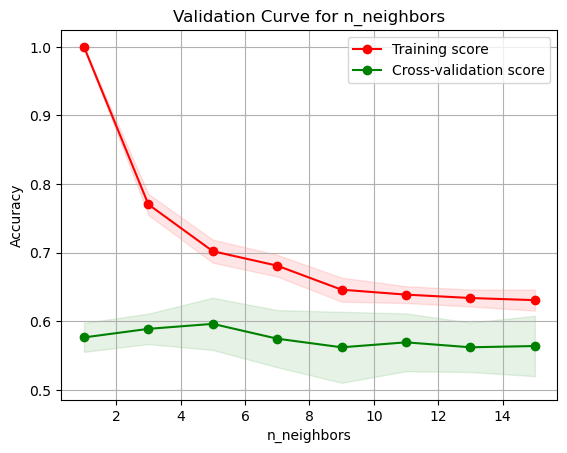

In [12]:
param_range_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
plot_validation_curve(
    estimator=neigh, X=training_images, y=training_labels, 
    param_name='n_neighbors', param_range=param_range_neighbors,
)

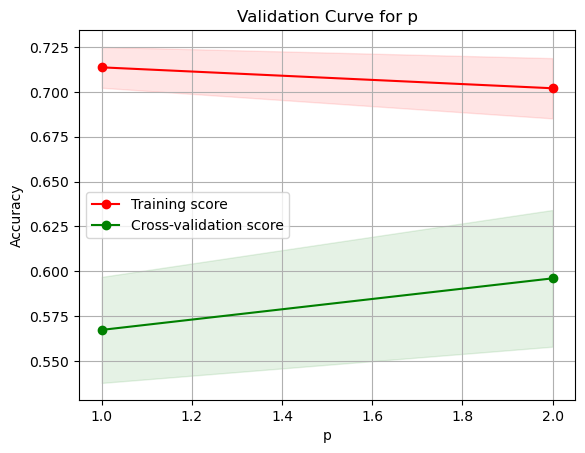

In [13]:
param_range_p = [1, 2]
plot_validation_curve(
    estimator=neigh, X=training_images, y=training_labels, 
    param_name='p', param_range=param_range_p,
)

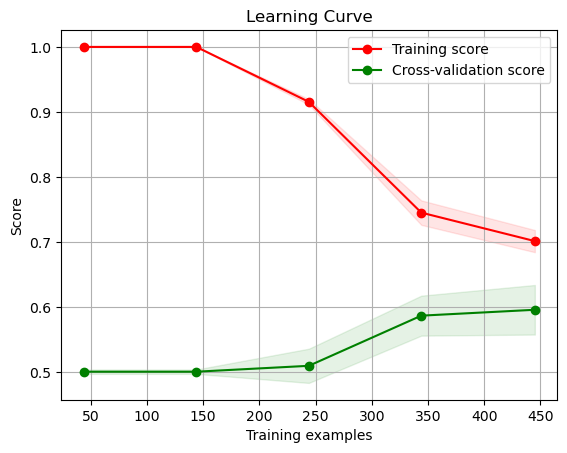

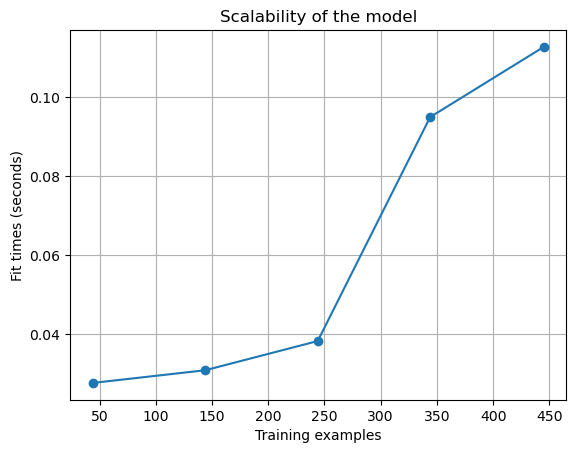

In [14]:
plot_learning_curve(neigh, training_images, training_labels, title="Learning Curve")

In [34]:
# Redefine model with best params
neigh = KNeighborsClassifier(n_neighbors=5, p=2)
neigh.fit(training_images, training_labels)

KNeighborsClassifier()

In [35]:
test_images, test_labels = test_data()

70
70


In [36]:
neigh.score(test_images, test_labels)

0.5357142857142857

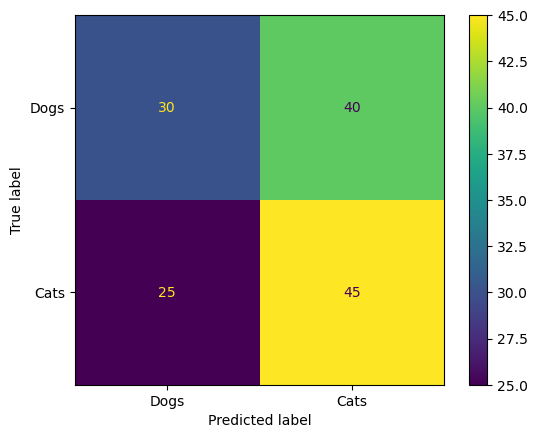

In [37]:
y_predict = neigh.predict(test_images)
confusion_matrix_data = confusion_matrix(y_true=test_labels, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

## SVM Classifier

Using rbf and linear kernels

### RBF SVC

In [19]:
rbf_svc = svm.SVC(kernel='rbf')

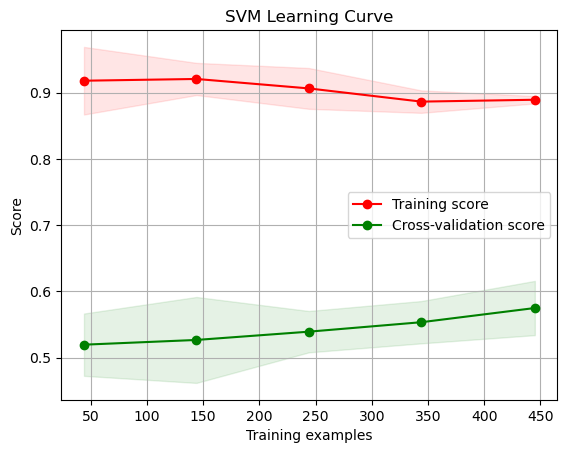

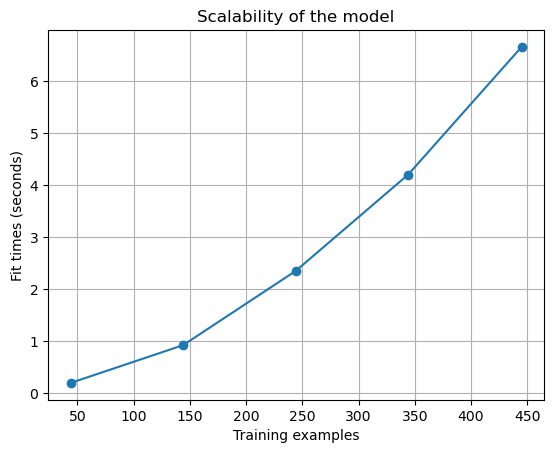

In [20]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(rbf_svc, training_images, training_labels, title="SVM Learning Curve", cv=cv)

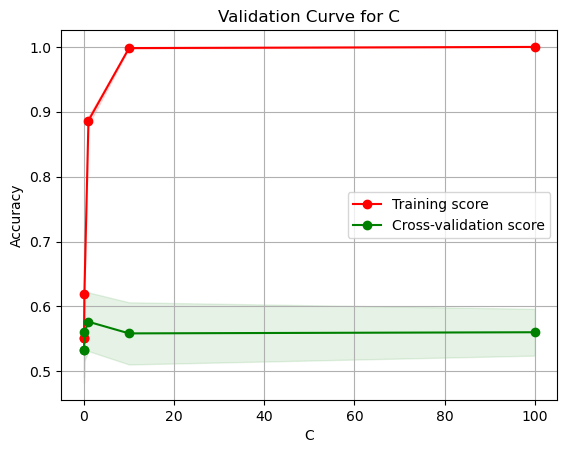

In [21]:
# Varying the regularization parameter (C)
param_range_C = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, training_images, training_labels, param_name="C", param_range=param_range_C)

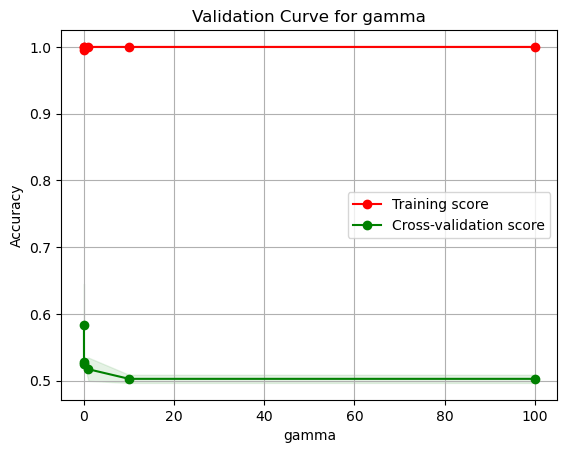

In [22]:
# Varying the gamma parameter for RBF kernel
param_range_gamma = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, training_images, training_labels, param_name="gamma", param_range=param_range_gamma)

## Linear SVC

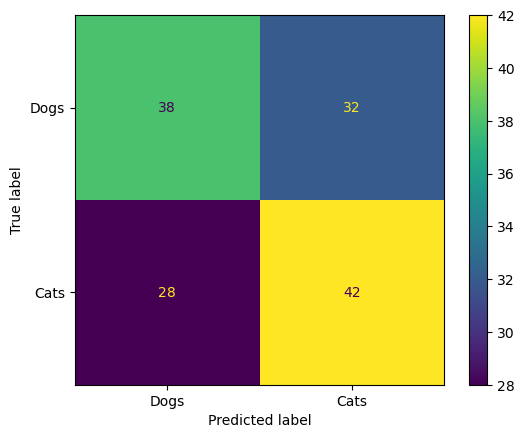

In [23]:
rbf_svc.fit(training_images, training_labels)
y_predict = rbf_svc.predict(test_images)
confusion_matrix_data = confusion_matrix(y_true=test_labels, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

In [24]:
linear_svc = svm.SVC(kernel='linear')

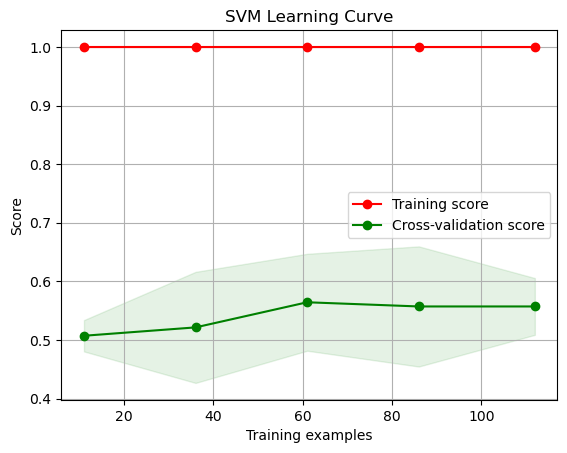

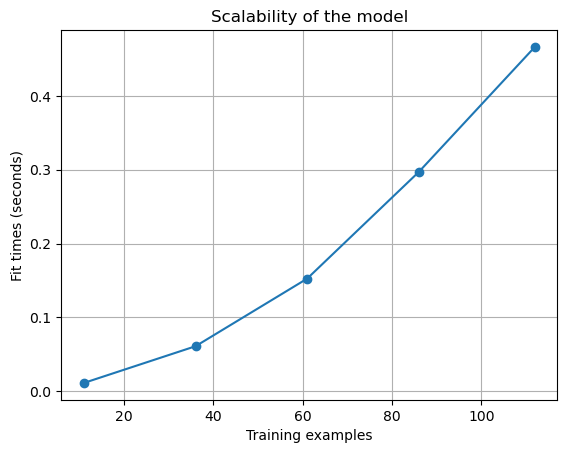

In [25]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(linear_svc, training_images, training_labels, title="SVM Learning Curve", cv=cv)

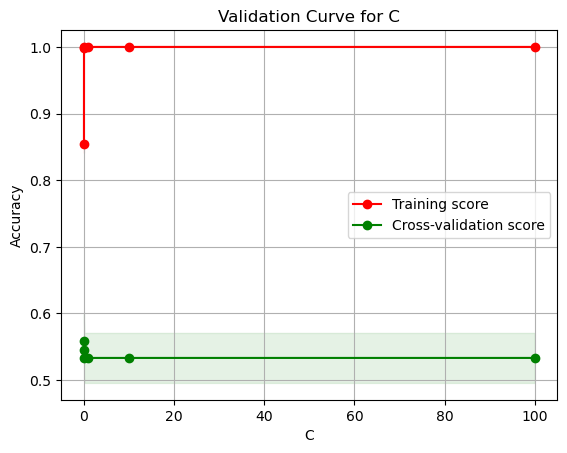

In [26]:
# Varying the C parameter
param_range_C = [0.001, 0.01, 0.1, 1, 10, 100]
plot_validation_curve(linear_svc, training_images, training_labels, param_name="C", param_range=param_range_C)

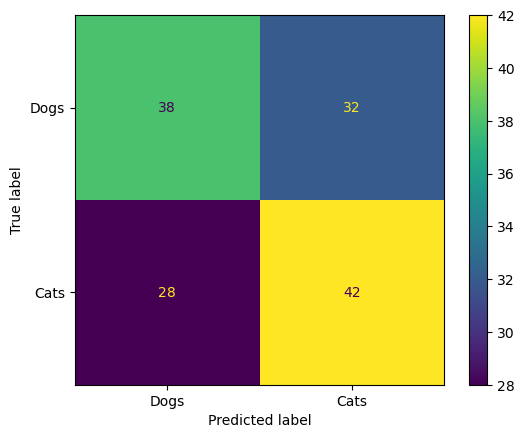

0.55

In [41]:
linear_svc.fit(training_images, training_labels)
y_predict = rbf_svc.predict(test_images)
confusion_matrix_data = confusion_matrix(y_true=test_labels, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()
linear_svc.score(test_images, test_labels)

## MLP Classifier

In [30]:
mlpc = MLPClassifier(max_iter=1000, random_state=42)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


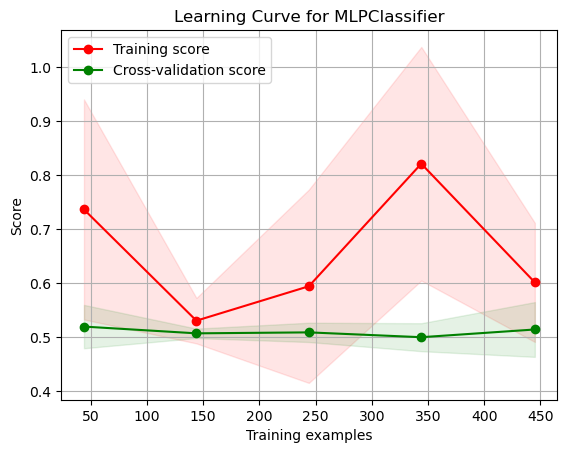

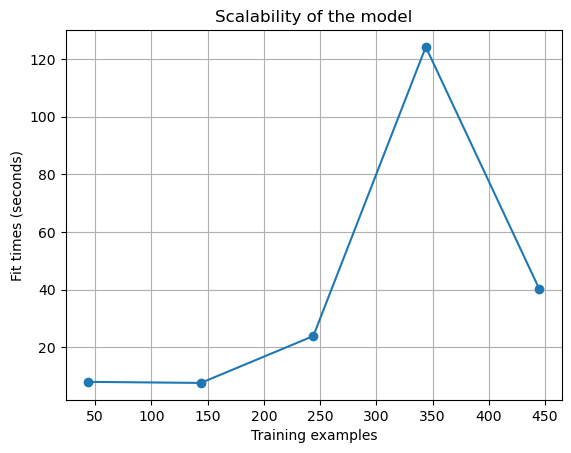

In [38]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(mlpc, training_images, training_labels, title="Learning Curve for MLPClassifier", cv=cv)


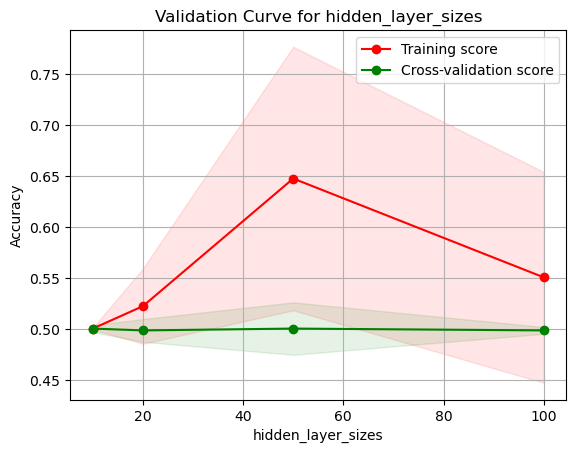

In [39]:

# Varying the number of hidden layers (neurons in the hidden layer)
param_range_hidden_layer_sizes = [10, 20, 50, 100]
plot_validation_curve(mlpc, training_images, training_labels, param_name="hidden_layer_sizes", param_range=param_range_hidden_layer_sizes)

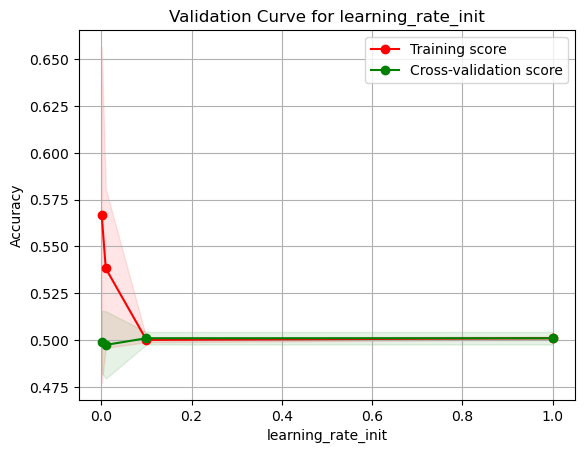

In [116]:
# Varying the learning rate
param_range_learning_rate = [0.001, 0.01, 0.1, 1.0]
mlp_learning_rate = MLPClassifier(max_iter=1000, random_state=42, hidden_layer_sizes=(100,))
plot_validation_curve(mlp_learning_rate, training_images, training_labels, param_name="learning_rate_init", param_range=param_range_learning_rate)

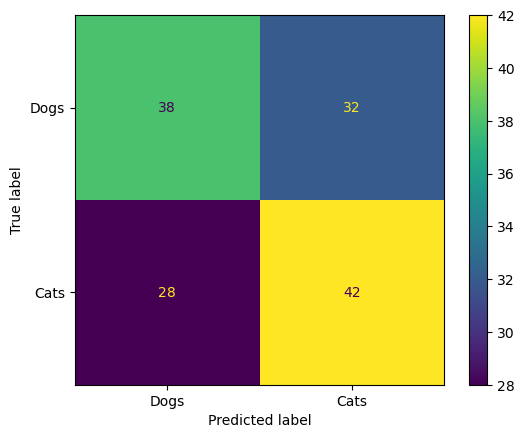

0.5

In [42]:
mlpc.fit(training_images, training_labels)
y_predict = rbf_svc.predict(test_images)
confusion_matrix_data = confusion_matrix(y_true=test_labels, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()